In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, hstack, vstack
from clevar.catalog import ClCatalog
from numpy.ma import masked
import sys
from clevar.match import output_matched_catalog
from clevar.match_metrics import recovery

In [ ]:
import pandas as pd
ClCatalog.read('/sps/lsst/groups/clusters/amico_validation_project/catalogs/AMICO/amico_cats/amico_map_associations_flxzb_mag/mag_i/Catalog_members.fits', 'c1',full=True)

In [5]:
df

,tile,ra_center,dec_center,ra_min,dec_min,ra_max,dec_max,list_of_neighbour_tiles
0,10066,50.638997,-40.244862,49.216301,-41.805161,52.061693,-38.684562,"10066,10067,10193,10194,10321,9810,9937,9938"
1,10067,53.451373,-40.249001,52.033020,-41.810426,54.869726,-38.687576,"10067,10066,10068,10194,10195,10322,9811,9938,..."
2,10068,56.262048,-40.260136,54.853973,-41.829644,57.670122,-38.690628,"10068,10067,10069,10195,10196,10323,9812,9939,..."
3,10069,59.032461,-40.251091,57.587608,-41.818663,60.477315,-38.683520,"10069,10068,10070,10196,10197,10324,9813,9940,..."
4,10070,61.843052,-40.240029,60.406108,-41.803828,63.279995,-38.676231,"10070,10069,10071,10197,10198,10325,9814,9941,..."
...,...,...,...,...,...,...,...,...
126,9942,63.287111,-38.541397,61.877807,-40.220881,64.696416,-36.861912,"9942,10070,10071,9686,9814,9815,9941,9943"
127,9943,66.089285,-38.695610,64.684080,-40.227196,67.494490,-37.164025,"9943,10071,10072,10199,9687,9815,9816,9942,9944"
128,9944,68.899500,-38.680058,67.475030,-40.223403,70.323969,-37.136713,"9944,10072,10073,10200,9688,9816,9817,9943,9945"
129,9945,71.707499,-38.750840,70.280184,-40.335040,73.134813,-37.166640,"9945,10073,10074,10201,9689,9817,9818,9944,9946"


In [14]:
np.array(df)

array([[10066, 50.63899695706186, -40.2448615016331, ...,
        52.06169257732261, -38.68456190832117,
        '10066,10067,10193,10194,10321,9810,9937,9938'],
       [10067, 53.451373190610525, -40.2490007970094, ...,
        54.86972640704586, -38.68757580743026,
        '10067,10066,10068,10194,10195,10322,9811,9938,9939'],
       [10068, 56.262047743746976, -40.26013602409857, ...,
        57.67012208817371, -38.690628252190166,
        '10068,10067,10069,10195,10196,10323,9812,9939,9940'],
       ...,
       [9944, 68.89949966434988, -38.68005827933827, ...,
        70.32396926339756, -37.13671305953056,
        '9944,10072,10073,10200,9688,9816,9817,9943,9945'],
       [9945, 71.70749851675518, -38.750840358633056, ...,
        73.13481279391256, -37.16664044457313,
        '9945,10073,10074,10201,9689,9817,9818,9944,9946'],
       [9946, 74.5154924008457, -38.71110962899139, ...,
        75.97287254648704, -37.1582463761312,
        '9946,10074,10202,9690,9818,9945']], dtype=o

In [39]:
t_df = Table(np.array(df))

In [40]:
t_df

col0,col1,col2,col3,col4,col5,col6,col7
object,object,object,object,object,object,object,object
10066,50.63899695706186,-40.2448615016331,49.21630133680112,-41.80516109494504,52.06169257732261,-38.68456190832117,"10066,10067,10193,10194,10321,9810,9937,9938"
10067,53.451373190610525,-40.2490007970094,52.03301997417519,-41.81042578658853,54.86972640704586,-38.68757580743026,"10067,10066,10068,10194,10195,10322,9811,9938,9939"
10068,56.262047743746976,-40.26013602409857,54.85397339932024,-41.82964379600697,57.67012208817371,-38.690628252190166,"10068,10067,10069,10195,10196,10323,9812,9939,9940"
10069,59.03246143231178,-40.25109148524513,57.58760778878509,-41.8186633627292,60.47731507583847,-38.68351960776105,"10069,10068,10070,10196,10197,10324,9813,9940,9941"
10070,61.84305171412215,-40.24002937313512,60.40610840671813,-41.8038276679632,63.27999502152616,-38.67623107830703,"10070,10069,10071,10197,10198,10325,9814,9941,9942"
10071,64.68121794072174,-40.24660035742773,63.26908689019356,-41.81619751285344,66.09334899124991,-38.67700320200203,"10071,10070,10072,10198,10199,10326,9815,9942,9943"
10072,67.49589364552813,-40.23789509510814,66.08878718531889,-41.8017311292613,68.90300010573735,-38.67405906095498,"10072,10071,10073,10199,10200,9816,9943,9944"
10073,70.3125899154128,-40.244921403710336,68.89921495777999,-41.804737610176986,71.72596487304561,-38.68510519724368,"10073,10072,10074,10200,10201,9817,9944,9945"
10074,73.1280963237094,-40.24152803583912,71.7207446019714,-41.80629074905239,74.53544804544741,-38.67676532262585,"10074,10073,10201,10202,9818,9945,9946"


In [41]:
t_df['col0'].name = 'tile'
t_df['col1'].name = 'ra_center'
t_df['col2'].name = 'dec_center'
t_df['col3'].name = 'ra_min'
t_df['col4'].name = 'dec_min'
t_df['col5'].name = 'ra_max'
t_df['col6'].name = 'dec_max'
t_df['col7'].name = 'list_of_neighbour_tiles'

In [42]:
t_df['tile'] = t_df['tile'].astype(int)
t_df['ra_center'] = t_df['ra_center'].astype(float)
t_df['dec_center'] = t_df['dec_center'].astype(float)
t_df['ra_min'] = t_df['ra_min'].astype(float)
t_df['dec_min'] = t_df['dec_min'].astype(float)
t_df['ra_max'] = t_df['ra_max'].astype(float)
t_df['dec_max'] = t_df['dec_max'].astype(float)
t_df['list_of_neighbour_tiles'] = t_df['list_of_neighbour_tiles'].astype(list)

In [43]:
t_df['list_of_neighbour_tiles'] = t_df['list_of_neighbour_tiles'].astype(bytes)

In [48]:
t_df['list_of_neighbour_tiles'][0].split(',')[0]

'10066'

In [45]:
t_df.write('/sps/lsst/groups/clusters/amico_validation_project/catalogs/CosmoDC2/cosmodc2_neighbours.fits')

In [54]:
tile_l = t_df[t_df['tile']==10066]['list_of_neighbour_tiles'][0].split(',')

In [55]:
tile_l

['10066', '10067', '10193', '10194', '10321', '9810', '9937', '9938']

In [56]:
for i in range(len(tile_l)):
    tile_l[i] = int(tile_l[i])

In [57]:
tile_l

[10066, 10067, 10193, 10194, 10321, 9810, 9937, 9938]

In [ ]:
tile_l

In [16]:
new_order = ['tile', 'ra_center', 'dec_center', 'ra_min', 'dec_min', 'ra_max', 'dec_max', 'list_of_neightbour_tiles']  # List or tuple
t_df2 = t_df[new_order]

KeyError: 'tile'

In [ ]:
c_merged_12 = ClCatalog.read(path+'output_catalog_' + 'p' + '.fits', 'merged',  full=True)

/sps/lsst/users/namourou/conda_clone_210223/descv1.1/clevar/clevar/catalog.py:267: UserWarning: id column missing, additional one is being created.
  warnings.warn(


In [ ]:
delta_ra = c_merged_12['cat1_ra']-c_merged_12['cat2_ra']
delta_dec = c_merged_12['cat1_dec']-c_merged_12['cat2_dec']

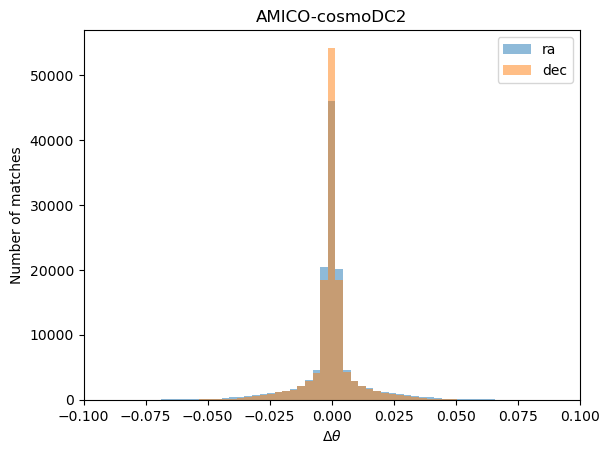

In [ ]:
plt.hist(delta_ra, bins = np.linspace(-0.075,0.075,50), alpha = .5, label = 'ra')
plt.hist(delta_dec, bins = np.linspace(-0.075,0.075,50), alpha = .5, label = 'dec')
plt.xlim(-0.1,0.1)
plt.xlabel('$\Delta\\theta$')
plt.ylabel('Number of matches')
plt.title('AMICO-cosmoDC2')
plt.legend()

W/ RedMapper

In [ ]:
path = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/matching_cats/amico_redmapper/'
c1 = ClCatalog.read(path + 'c1_p.fits', 'c1', full=True)
c2 = ClCatalog.read(path + 'c2_p.fits', 'c2', full=True)
c_merged_12 = ClCatalog.read(path+'output_catalog_' + 'p' + '.fits', 'merged',  full=True)

In [ ]:
delta_ra = c_merged_12['cat1_ra']-c_merged_12['cat2_ra']
delta_dec = c_merged_12['cat1_dec']-c_merged_12['cat2_dec']

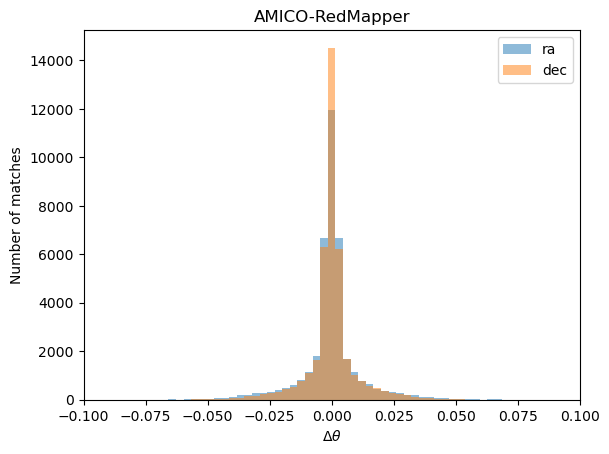

In [ ]:
plt.hist(delta_ra, bins = np.linspace(-0.075,0.075,50), alpha = .5, label = 'ra')
plt.hist(delta_dec, bins = np.linspace(-0.075,0.075,50), alpha = .5, label = 'dec')
plt.xlim(-0.1,0.1)
plt.xlabel('$\Delta\\theta$')
plt.ylabel('Number of matches')
plt.title('AMICO-RedMapper')
plt.legend()

In [ ]:
min(c1['mass']), min(c2['mass']), max(c1['mass']), max(c2['mass'])

(5.007845, 7675484754208.451, 266.29504, 1896877410332845.2)

rm w/ cdc

In [ ]:
path = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/matching_cats/redmapper_cosmoDC2/'
c1 = ClCatalog.read(path + 'c1_p.fits', 'c1', full=True)
c2 = ClCatalog.read(path + 'c2_p.fits', 'c2', full=True)
c_merged_12 = ClCatalog.read(path+'output_catalog_' + 'p' + '.fits', 'merged',  full=True)

In [ ]:
delta_ra = c_merged_12['cat1_ra']-c_merged_12['cat2_ra']
delta_dec = c_merged_12['cat1_dec']-c_merged_12['cat2_dec']

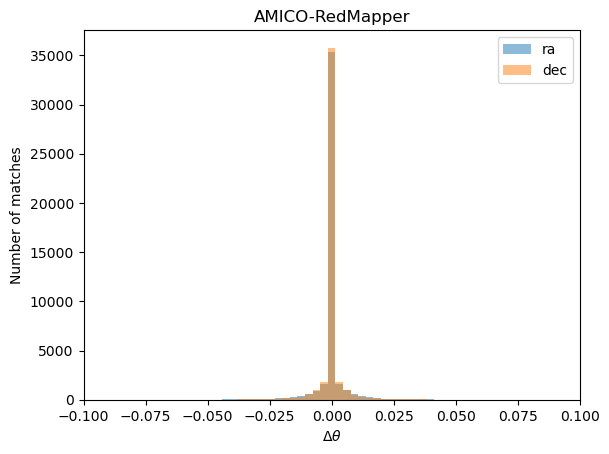

In [ ]:
plt.hist(delta_ra, bins = np.linspace(-0.075,0.075,50), alpha = .5, label = 'ra')
plt.hist(delta_dec, bins = np.linspace(-0.075,0.075,50), alpha = .5, label = 'dec')
plt.xlim(-0.1,0.1)
plt.xlabel('$\Delta\\theta$')
plt.ylabel('Number of matches')
plt.title('RedMapper-cosmoDC2')
plt.legend()